In [1]:
#load the packages
import quandl
import os
from dotenv import load_dotenv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env_file = 'env_vars.env'
load_dotenv(env_file)
quandl_key = os.getenv('QUANDL_KEY')
print(quandl_key)

L5bWubxqT9kPhKTqgCsb


In [3]:
# set the global quandl key variable
quandl.ApiConfig.api_key = quandl_key

In [4]:
# Based on correlation matrix, we selected the least correlated ten stocks to start to build the portfolio
data = quandl.get(["WIKI/DUK.11","WIKI/MET.11","WIKI/KR.11","WIKI/NVDA.11","WIKI/FB.11","WIKI/SCCO.11",
                   "WIKI/CPB.11","WIKI/TGT.11","WIKI/EBAY.11","WIKI/NKE.11"], start_date="2013-09-03", end_date="2017-12-31")

In [5]:
data.head()

,WIKI/DUK - Adj. Close,WIKI/MET - Adj. Close,WIKI/KR - Adj. Close,WIKI/NVDA - Adj. Close,WIKI/FB - Adj. Close,WIKI/SCCO - Adj. Close,WIKI/CPB - Adj. Close,WIKI/TGT - Adj. Close,WIKI/EBAY - Adj. Close,WIKI/NKE - Adj. Close
Date,,,,,,,,,,
2013-09-03,54.715902,41.479276,17.373123,14.008419,41.87,26.337253,38.263975,55.899888,19.796705,30.650791
2013-09-04,54.488480,42.615574,17.618479,14.141290,41.78,25.995581,38.416136,55.864725,20.241266,31.051268
2013-09-05,54.581133,42.633191,17.623198,14.179253,42.66,25.919653,37.485269,55.785609,20.437974,31.170457
2013-09-06,55.128629,42.263234,17.646790,14.122309,43.95,26.318271,37.583726,55.636168,20.784180,30.979754
2013-09-09,55.229706,42.694851,17.783623,14.354833,44.04,26.868744,37.583726,56.198771,20.721233,31.179993


In [6]:
# Consolidate the data into a pandas DataFrame.
import pandas as pd
df = pd.DataFrame(data)
df.columns = ["DUK", "KR", "MET", "NVDA", "FB", "SCCO", "CPB","TGT", "EBAY", "NKE"]

In [7]:
# Calculate the return of each stock
df_ret = df.pct_change() * 100

In [8]:
df_ret = df_ret.iloc[1:]
df_ret.head(10)
df_ret.columns = ["DUK", "KR", "MET", "NVDA", "FB", "SCCO", "CPB","TGT", "EBAY", "NKE"]

In [9]:
df_ret.head()

,DUK,KR,MET,NVDA,FB,SCCO,CPB,TGT,EBAY,NKE
Date,,,,,,,,,,
2013-09-04,-0.415640,2.739435,1.412276,0.948509,-0.214951,-1.297297,0.397661,-0.062903,2.245628,1.306580
2013-09-05,0.170042,0.041339,0.026781,0.268456,2.106271,-0.292077,-2.423113,-0.141621,0.971817,0.383848
2013-09-06,1.003086,-0.867769,0.133869,-0.401606,3.023910,1.537898,0.262655,-0.267885,1.693936,-0.611808
2013-09-09,0.183346,1.021259,0.775401,1.646505,0.204778,2.091598,0.000000,1.011218,-0.302858,0.646353
2013-09-10,0.579533,2.372602,-0.397984,2.148760,-0.999092,0.176616,-1.786140,1.251369,1.556863,2.171254


In [10]:
# Extract the mean & standard deviation
df_stats = df_ret.describe()
df_stats_raw = df_stats[(df_stats.index == 'mean') | (df_stats.index == 'std')].T
df_stats_raw.sort_values(by = ['mean'], inplace = True)
df_stats_sorted = df_stats_raw
df_stats_sorted.T.round(2)

,TGT,CPB,KR,DUK,MET,SCCO,EBAY,NKE,FB,NVDA
mean,0.03,0.03,0.03,0.04,0.05,0.07,0.07,0.07,0.15,0.27
std,1.47,1.23,1.56,0.97,1.55,1.85,1.59,1.37,1.80,2.31


In [11]:
# get correlation matrix of daily returns
df_corr = df_ret.corr()
df_corr

,DUK,KR,MET,NVDA,FB,SCCO,CPB,TGT,EBAY,NKE
DUK,1.000000,-0.037155,0.120736,0.072651,0.117003,0.123318,0.367108,0.103009,0.093452,0.130094
KR,-0.037155,1.000000,0.213124,0.245368,0.280523,0.374204,0.156821,0.253651,0.305316,0.364911
MET,0.120736,0.213124,1.000000,0.131387,0.167966,0.136102,0.265140,0.389896,0.170971,0.266189
NVDA,0.072651,0.245368,0.131387,1.000000,0.270275,0.176080,0.094081,0.115063,0.295243,0.216816
FB,0.117003,0.280523,0.167966,0.270275,1.000000,0.187240,0.134395,0.093515,0.266820,0.348629
SCCO,0.123318,0.374204,0.136102,0.176080,0.187240,1.000000,0.115901,0.173769,0.207763,0.170399
CPB,0.367108,0.156821,0.265140,0.094081,0.134395,0.115901,1.000000,0.228432,0.112832,0.229768
TGT,0.103009,0.253651,0.389896,0.115063,0.093515,0.173769,0.228432,1.000000,0.128817,0.315941
EBAY,0.093452,0.305316,0.170971,0.295243,0.266820,0.207763,0.112832,0.128817,1.000000,0.240833
NKE,0.130094,0.364911,0.266189,0.216816,0.348629,0.170399,0.229768,0.315941,0.240833,1.000000


Text(0.5, 1, 'Correlations of stocks')

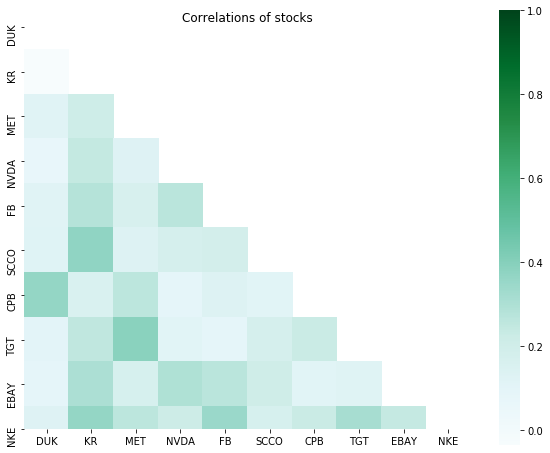

In [12]:
# Heatmap representation of correlation matrix
plt.figure(figsize = (10, 8))
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, mask = mask, cmap = 'BuGn', square = True)
plt.title('Correlations of stocks')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


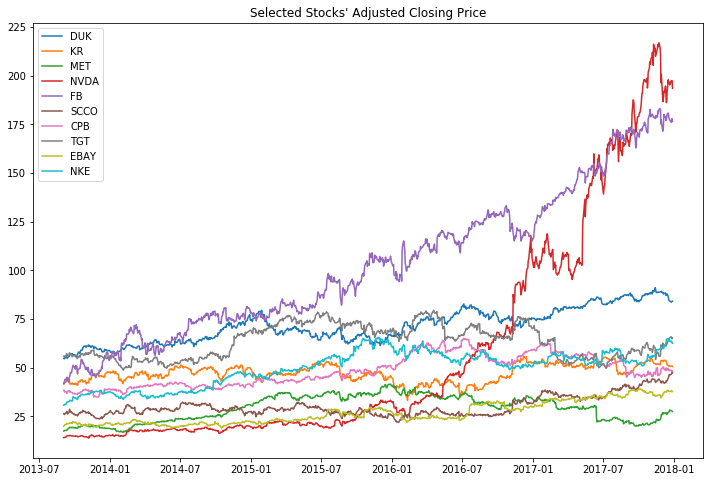

In [13]:
#Plot the time series of Adjusted closing price
%matplotlib inline

plt.figure(figsize=(12,8))
plt.title("Selected Stocks' Adjusted Closing Price")
plt.plot(data.index, data["DUK"], label='DUK')
plt.plot(data.index, data["KR"], label='KR')
plt.plot(data.index, data["MET"], label='MET')
plt.plot(data.index, data["NVDA"], label='NVDA')
plt.plot(data.index, data["FB"], label='FB')
plt.plot(data.index, data["SCCO"], label='SCCO')
plt.plot(data.index, data["CPB"], label='CPB')
plt.plot(data.index, data["TGT"], label='TGT')
plt.plot(data.index, data["EBAY"], label='EBAY')
plt.plot(data.index, data["NKE"], label='NKE')
plt.legend(loc='upper left')
plt.show()

In [14]:
import pypfopt
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt.efficient_frontier import EfficientFrontier

In [15]:
#calculate the expected returns and coviarance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# maximises the Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

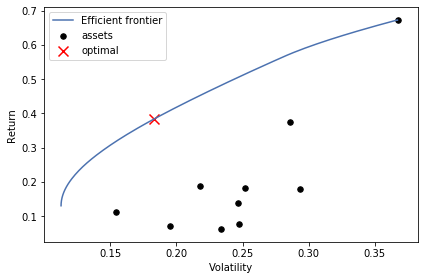

In [16]:
#plot the efficient frontier
from pypfopt import plotting
from pypfopt import cla

claModel = cla.CLA(mu, S)
mus, eff_std_list, weights = claModel.efficient_frontier(300)

weight_lists = []
for i in range(len(mu)):
    weight_lists.append([])
for i in range(len(weights)):
    for j in range(len(weights[i])):
        weight_lists[j].append(weights[i][j][0] * 100)
        
plotting.plot_efficient_frontier(claModel, 300) # 200 points to plot

Text(0, 0.5, 'portfolio weights(%)')

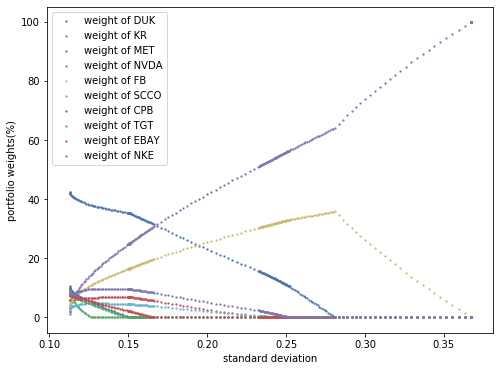

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(eff_std_list, weight_lists[0], s = 1.5, label = 'weight of DUK')
plt.scatter(eff_std_list, weight_lists[1], s = 1.5, label = 'weight of KR')
plt.scatter(eff_std_list, weight_lists[2], s = 1.5, label = 'weight of MET')
plt.scatter(eff_std_list, weight_lists[3], s = 1.5, label = 'weight of NVDA')
plt.scatter(eff_std_list, weight_lists[4], s = 1.5, label = 'weight of FB')
plt.scatter(eff_std_list, weight_lists[5], s = 1.5, label = 'weight of SCCO')
plt.scatter(eff_std_list, weight_lists[6], s = 1.5, label = 'weight of CPB')
plt.scatter(eff_std_list, weight_lists[7], s = 1.5, label = 'weight of TGT')
plt.scatter(eff_std_list, weight_lists[8], s = 1.5, label = 'weight of EBAY')
plt.scatter(eff_std_list, weight_lists[9], s = 1.5, label = 'weight of NKE')
plt.legend()
plt.xlabel('standard deviation')
plt.ylabel('portfolio weights(%)')

In [18]:
# get the cleaned weights
# clean_weights() truncates tiny weights to zero and rounds the rest
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict([('DUK', 0.23655), ('KR', 0.0), ('MET', 0.02832), ('NVDA', 0.40896), ('FB', 0.25015), ('SCCO', 0.02226), ('CPB', 0.0), ('TGT', 0.0), ('EBAY', 0.0), ('NKE', 0.05376)])


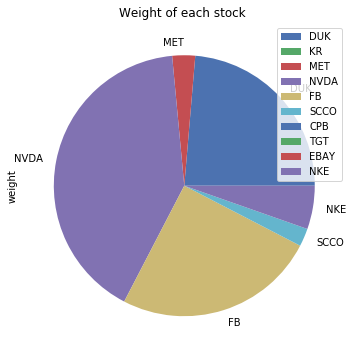

In [19]:
# plot the optimized weight of each stock 
pd_weight = pd.Series(cleaned_weights).to_frame()
pd_weight.columns = ["weight"]
pd_weight.plot.pie(y="weight", figsize=(6,6), title="Weight of each stock ")

In [20]:
# get the expected performance of the portfolio with optimal weights
ef.portfolio_performance(verbose=True)

Expected annual return: 41.3%
Annual volatility: 19.8%
Sharpe Ratio: 1.99


(0.41308349903282127, 0.19765690827332077, 1.9887162177466815)

## Calculate Diversifiable and Non-Diversifiable Risk of a Portfolio

### Calculate Portfolio variance and portfolio Volatility

In [21]:
weight = np.array(pd_weight.weight)
weight

array([0.23655, 0.     , 0.02832, 0.40896, 0.25015, 0.02226, 0.     ,
       0.     , 0.     , 0.05376])

In [22]:
df_ret = df_ret/100

In [23]:
#portfolio variance
pfolio_var = np.dot(weight.T, np.dot(df_ret.cov() * 250, weight))
pfolio_var 

0.0387580231192973

In [24]:
#portfolio volatility
pfolio_vol = (np.dot(weight.T, np.dot(df_ret.cov() * 250, weight))) ** 0.5
pfolio_vol

0.19687057453895263

### calculate annual variances

In [25]:
name = ["DUK", "KR", "MET", "NVDA", "FB", "SCCO", "CPB","TGT", "EBAY", "NKE"]

In [26]:
var_ann = []
for s in name:
    var_ann.append(df_ret[s].var() * 250)
var_ann

[0.023594839346596775,
 0.060790505138256165,
 0.06029241329596585,
 0.13377368180625035,
 0.08113704129467071,
 0.08563538257397517,
 0.03770528664477694,
 0.05415630437761036,
 0.0631261612393811,
 0.047060777842260024]

### calculate Diversifiable and Non-Diversifiable Risk

In [27]:
div_risk = pfolio_var
for i in range(0,len(weight)):
    div_risk = div_risk - (weight[i] ** 2 * var_ann[i])
div_risk

0.009760381026883065

In [28]:
non_div_risk = pfolio_var - div_risk
non_div_risk

0.028997642092414233

In [29]:
print('Diversifiable Risk:'+ str(div_risk) + '\n'+'Non-Diversifiable Risk:'+ str(non_div_risk))

Diversifiable Risk:0.009760381026883065
Non-Diversifiable Risk:0.028997642092414233
